In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('infosys.csv', parse_dates=['Date'], infer_datetime_format=True, index_col='Date', dayfirst=True)

In [130]:
df.head(15)

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2000-01-03  5.890625  5.906250  5.462891  5.767578   3.861567   5331200
2000-01-04  5.641113  6.281250  5.570313  5.812500   3.891644   5056000
2000-01-05  5.476563  5.855469  5.328125  5.765625   3.860260   6054400
2000-01-06  5.598633  5.703125  5.156250  5.156250   3.452265   4704000
2000-01-07  4.945313  5.515625  4.703125  5.515625   3.692876   7884800
2000-01-10  5.812500  5.847656  5.546875  5.593750   3.745184   3532800
2000-01-11  5.441406  5.442383  5.149414  5.265625   3.525495   8512000
2000-01-12  5.375000  5.546875  4.906250  5.171875   3.462727   3968000
2000-01-13  5.343750  5.343750  4.875000  4.968750   3.326727   2560000
2000-01-14  5.100586  5.269531  4.644531  4.658203   3.118808   7091200
2000-01-18  4.390625  4.843750  4.156250  4.816406   3.224729  10982400
2000-01-19  4.781250  4.937500  4.667969  4.746094   3.177653   2316800
2000-01-20  4.738281  4.890625  4.574219  4.621094   3.093962   4780800
2000-01-21  4.601563  4.890625  4.531250  4.742188   3.175037   7692800
2000-01-24  4.796875  4.994141  4.765625  4.968750   3.326727   6758400

In [131]:
df_new=df.iloc[::30].filter(['Open'])

In [132]:
df_new.count()

Open    193
dtype: int64

<AxesSubplot:xlabel='Date'>

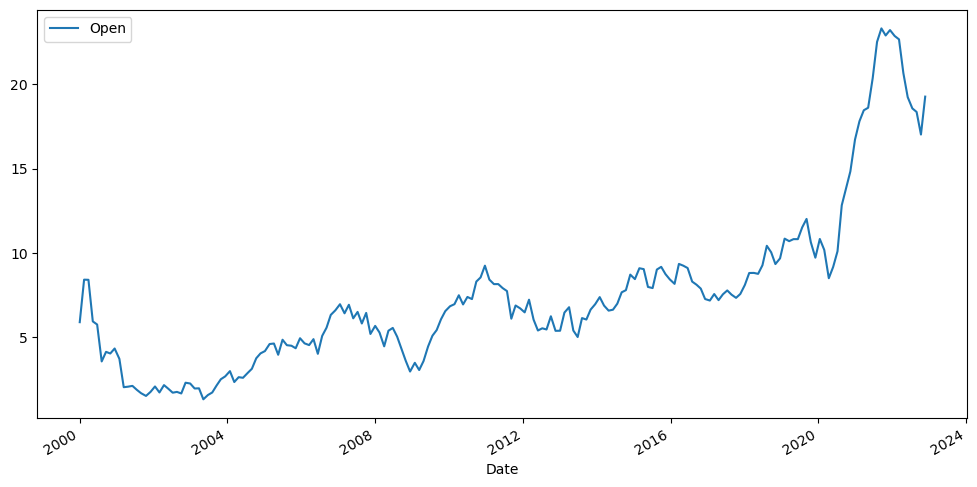

In [133]:
df_new.plot(figsize=(12,6))

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#scaling=np.array(df_new)
scaling=scaler.fit_transform(df_new)
scaling

array([[0.20793119],
       [0.32254175],
       [0.3221869 ],
       [0.21006018],
       [0.20163293],
       [0.10210274],
       [0.1279167 ],
       [0.12348132],
       [0.13696491],
       [0.10893326],
       [0.03264449],
       [0.03406381],
       [0.0361928 ],
       [0.02561885],
       [0.01650678],
       [0.00908368],
       [0.02002671],
       [0.03464576],
       [0.01847962],
       [0.03826502],
       [0.02838651],
       [0.01782673],
       [0.01995572],
       [0.01575451],
       [0.04472297],
       [0.04257977],
       [0.02915295],
       [0.02959296],
       [0.        ],
       [0.01149654],
       [0.01839446],
       [0.03725732],
       [0.05410469],
       [0.06178326],
       [0.07593392],
       [0.04655388],
       [0.05961167],
       [0.05800786],
       [0.07096628],
       [0.08232088],
       [0.11059385],
       [0.12376519],
       [0.13001022],
       [0.14902918],
       [0.15039173],
       [0.12007494],
       [0.16061088],
       [0.145

In [135]:
train_len=round(len(scaling)*0.7)
train_len
training_data=scaling[:train_len]
testing_data=scaling[train_len:]

In [136]:

def preprocess(num_steps,data):
    # Prepare the training data
    X, y = [], []
    for i in range(num_steps, len(data)):
        X.append(data[i - num_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)


In [154]:

step_size=10
x_train,y_train=preprocess(step_size,training_data)
x_test,y_test=preprocess(step_size,testing_data)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((125, 10, 1), (125, 1), (48, 10, 1), (48, 1))

In [155]:
import tensorflow as tf
from keras.layers import Dense,LSTM
from keras.models import Sequential
model2 = Sequential()
model2.add(LSTM(units=64, activation='tanh', input_shape=(step_size, 1)))
model2.add(Dense(units=1))
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [156]:
model2.fit(x_train,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 4s 11ms/step - loss: 0.0443 - mean_absolute_error: 0.1786
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 0.0197 - mean_absolute_error: 0.1175
Epoch 3/20
4/4 [==============================] - 0s 10ms/step - loss: 0.0071 - mean_absolute_error: 0.0703
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.0065 - mean_absolute_error: 0.0656
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0705
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0598
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 0.0043 - mean_absolute_error: 0.0540
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0552
Epoch 9/20
4/4 [==============================] - 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0546
Epoch 10/20
4/4 [============

2/2 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'actual vs predict on training data')

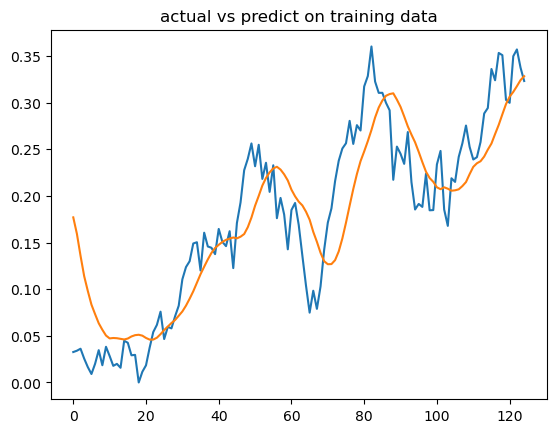

In [157]:
train_predict=model2.predict(x_train)
test_predict=model2.predict(x_test)
plt.plot(y_train)
plt.plot(train_predict)
plt.title("actual vs predict on training data")


Text(0.5, 1.0, 'actual vs predict on testing data')

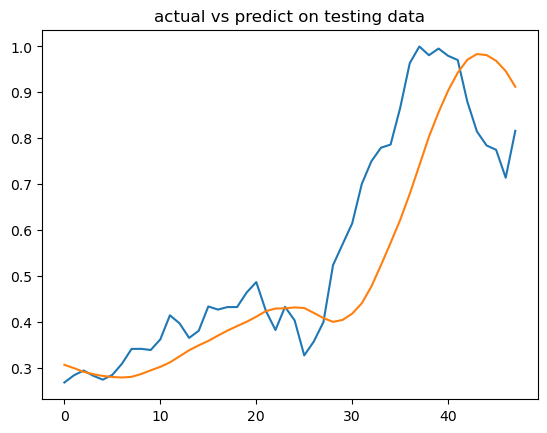

In [158]:
plt.plot(y_test)
plt.plot(test_predict)
plt.title("actual vs predict on testing data")

In [159]:
X_pred2 = []
data2=testing_data[-step_size:,]
for i in range(2):  # Predict for the next 30 days
    X_pred2.append(data2[-step_size:,])
    #print(f'length of X_pred at iteration{i} {X_pred}')
    #print(X_pred)
    pred_input2 = np.array(X_pred2[-1].reshape(1, step_size,1))
    #print("shape of rped_input",pred_input.shape)
    pred2 = model2.predict(pred_input2)
    #print("prediction shape",pred.shape)
    data2 = np.concatenate((data2, pred2), axis=0)
    #print(f'test data at iteration{i} {data2}')


1/1 [==============================] - 0s 48ms/step


In [160]:
original_data2=testing_data[-step_size:,]
predicted_data2=data2[-step_size:,]
original_data2.shape

(10, 1)

In [162]:
original_data2=original_data2.reshape(10,)
original_data2.shape

(10,)

In [163]:
predicted_data3=np.array(predicted_data2)
predicted_data3
predicted_data3=predicted_data3.reshape(10)
predicted_data3.shape

(10,)

Text(0.5, 1.0, 'Actual data of previous 5 weeks  and predicted data for the next 5 weeks ')

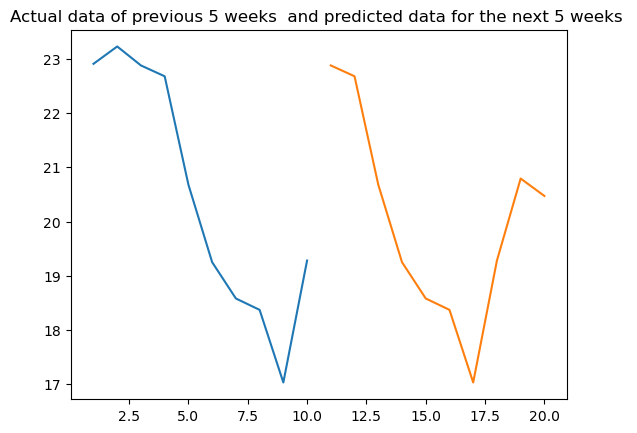

In [167]:

actual=np.arange(1,11)
predict=np.arange(11,21)
plt.plot(actual,scaler.inverse_transform(original_data2.reshape(-1,1)))
plt.plot(predict,scaler.inverse_transform(predicted_data3.reshape(-1,1)))
plt.title("Actual data of previous 5 weeks  and predicted data for the next 5 weeks ")

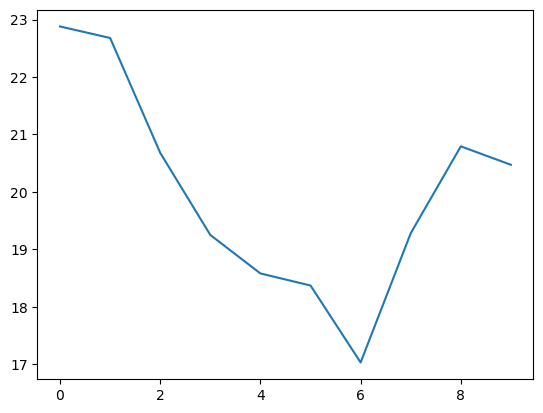

In [176]:
plt.plot(scaler.inverse_transform(predicted_data3.reshape(-1,1)))


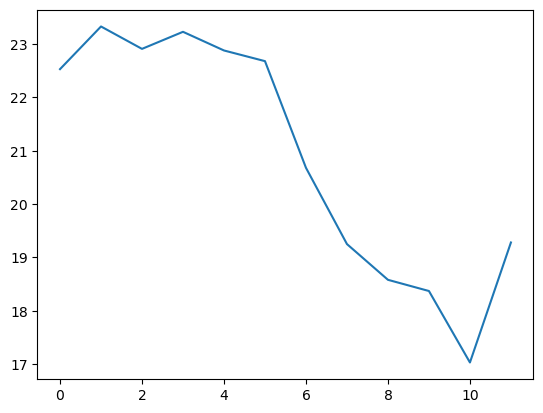

In [175]:
plt.plot(scaler.inverse_transform(testing_data[-12:].reshape(-1,1)))
